In [55]:
import torch
from dataset import CardDlayingDataset, final_transforms
import matplotlib.pyplot as plt
import numpy as np

In [56]:
def focal_loss(pred_maps, gt_maps):

    positif_mask = gt_maps.eq(1).float()
    negatif_mask = gt_maps.lt(1).float()

    rev_prob_pow_beta = torch.pow(1 - gt_maps, 4)

    pred_maps = torch.clamp(pred_maps, 1e-12) # guaranty minimal value for numericall stability

    positive_instance_loss = torch.log(pred_maps) * torch.pow(1 - pred_maps, 2) * positif_mask # equivalent of if Y_hat_xyz == 1 then focalLoss
    negative_instance_loss = rev_prob_pow_beta * torch.pow(pred_maps, 2) * torch.log(1 - pred_maps) * negatif_mask # else

    npositif = positif_mask.sum() #  == N

    positive_instance_loss = positive_instance_loss.sum()
    negative_instance_loss = negative_instance_loss.sum()

    if npositif:
        return -(positive_instance_loss + negative_instance_loss) / npositif
    return -(negative_instance_loss)

In [57]:
BASE_PATH = "/Users/sacha.lahlou/Library/CloudStorage/OneDrive-PMU/centernetImplementation/centernet/cardDetectionDataset/"
TEST_PATH = "test/"
TRAIN_PATH = "train/"

ds = CardDlayingDataset(BASE_PATH + TRAIN_PATH, final_transforms)

sample = ds[0]




torch.Size([64, 64]) torch.Size([64, 64])


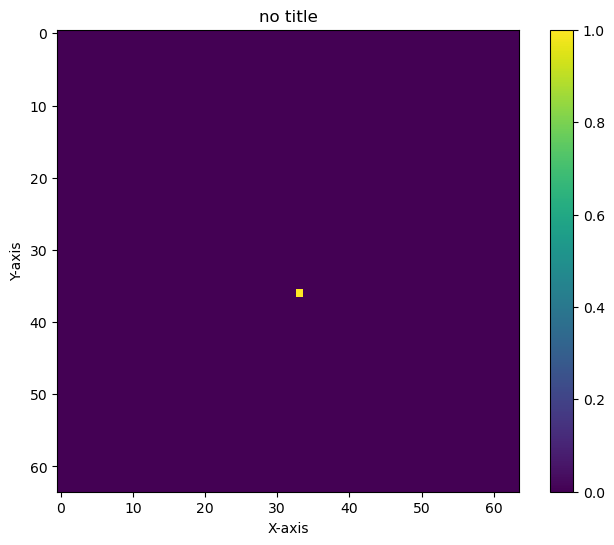

In [58]:
gt_maps = torch.tensor(sample['hmaps'])[12]
pred_maps = torch.rand(gt_maps.shape)

print(gt_maps.shape, pred_maps.shape)

def plot_heatmap(matrix, title='no title', figsize=(8, 6)):
    # Plot the heatmap
    plt.figure(figsize=figsize) 
    plt.imshow(matrix, cmap='viridis', interpolation='nearest')
    plt.colorbar()  # Add colorbar to show the scale
    plt.title(title)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.show()

plot_heatmap(gt_maps)

In [59]:
focal_loss(pred_maps=pred_maps, gt_maps=gt_maps)

tensor(2512.2551)

In [60]:
test = torch.rand(32, 2, 64, 64)

print(test.shape)

print(test[1, :, [2, 3, 4, 5], [6, 10, 32, 3]].shape)
print(test[1, :, 2, 6].shape)

torch.Size([32, 2, 64, 64])
torch.Size([2, 4])
torch.Size([2])


In [83]:
fake_coordinates = np.array([np.stack([np.random.randint(0, 64, size=2), 
                                       np.random.randint(0, 64, size=2),
                                       np.random.randint(0, 64, size=2),
                                       np.random.randint(0, 64, size=2),
                                       np.random.randint(0, 64, size=2)]) for _ in range(10)])

fake_coordinates = torch.tensor(fake_coordinates)
fake_size_head = torch.rand(10, 2, 64, 64)

print(fake_coordinates.shape)
print(fake_size_head.shape)


torch.Size([10, 5, 2])
torch.Size([10, 2, 64, 64])


In [98]:

def get_predictions_from_head(head, center_position_save):
    ret = torch.zeros(center_position_save.shape)

    for idx, (center_pos, pred) in enumerate(zip(center_position_save, head)):
        for i, ct in enumerate(center_pos):
            ret[idx][i] = pred[:, ct[0], ct[1]]
    return ret



ret = get_predictions_from_head(fake_size_head, fake_coordinates)




tensor([[0.2946, 0.3918],
        [0.5603, 0.0169],
        [0.0518, 0.2686],
        [0.9507, 0.4828],
        [0.0105, 0.9161]])
torch.Size([10, 5, 2])


In [101]:
lossl1 = torch.nn.L1Loss()

fake_size_map = torch.rand(ret.shape)


In [109]:
print(ret.shape, fake_size_map.shape)
loss = lossl1(ret, fake_size_map)

print(loss.item())

torch.Size([10, 5, 2]) torch.Size([10, 5, 2])
0.47910675406455994
